In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [882]:
ds=pd.read_csv("cardio_train.csv", sep=';')
ds.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [883]:
data = ds.drop(columns = ['id'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [884]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [885]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [886]:
data['age'] = data['age'].map(lambda x: round(x/365))
data['bmi'] = round(data['weight']/ (data['height']/100)**2, 2)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,62,1,155,69.0,130,80,2,2,0,0,1,0,28.72
1,40,1,163,71.0,110,70,1,1,0,0,1,1,26.72
2,60,1,165,70.0,120,80,1,1,0,0,1,0,25.71
3,40,2,165,85.0,120,80,1,1,1,1,1,0,31.22
4,64,1,155,62.0,120,80,1,1,0,0,1,0,25.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,53,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69297,62,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69298,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69299,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10


In [887]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,27.554768
std,6.765427,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.091927
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.470000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.880000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.220000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.670000


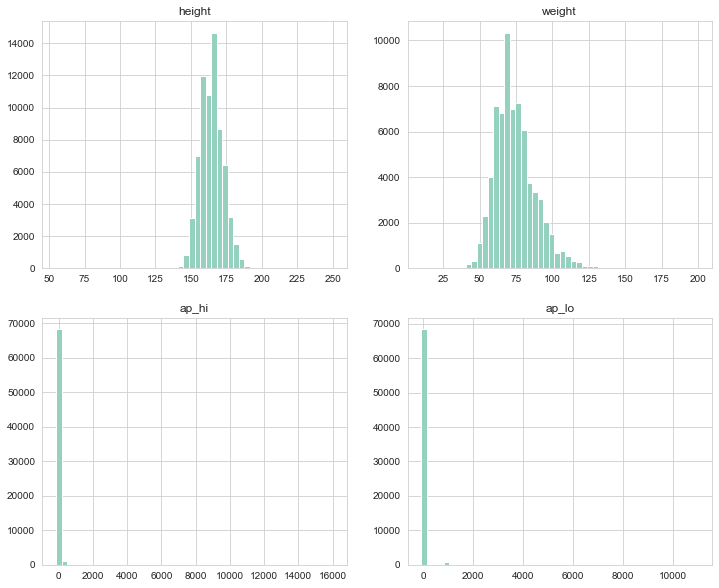

In [888]:
figure = plt.figure(figsize=(12,10))

ax1 = plt.subplot(221)
ax1 = plt.hist(data['height'], bins=50)
ax1 = plt.title('height')

ax2 = plt.subplot(222)
ax2 = plt.hist(data['weight'], bins=50)
ax2 = plt.title('weight')

ax3 = plt.subplot(223)
ax3 = plt.hist(data['ap_hi'], bins=50)
ax3 = plt.title('ap_hi')

ax4 = plt.subplot(224)
ax4 = plt.hist(data['ap_lo'], bins=50)
ax4 = plt.title('ap_lo')


plt.show()

In [889]:
def outliers_iqr(ys):
    quartile1, quartile3 = np.percentile(ys, [25,75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr*3)
    upper_bound = quartile3 + (iqr*3)
    
    print(f'Q1:{quartile1}, Q3:{quartile3}, IQR:{iqr}')
    print(f'Lower Bound:{lower_bound}, Upper Bound:{upper_bound}')
    
    result = np.where((ys > upper_bound) | (ys < lower_bound))
    boundary = (lower_bound, upper_bound)
    
    print(f'Number of outliers: {len(result[0])}')
    
    return result, boundary

In [890]:
height_outlier_index = list(outliers_iqr(data['height'])[0][0])
data_height_outlier = data.iloc[height_outlier_index,:]
#data_height_outlier

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92


In [891]:
weight_outlier_index = list(outliers_iqr(data['weight'])[0][0])
data_weight_outlier = data.iloc[weight_outlier_index,:]
#data_weight_outlier

Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168


In [892]:
weight_outlier_index = list(outliers_iqr(data['bmi'])[0][0])
data_weight_outlier = data.iloc[weight_outlier_index,:]

Q1:23.88, Q3:30.22, IQR:6.34
Lower Bound:4.859999999999999, Upper Bound:49.239999999999995
Number of outliers: 276


In [893]:
ap_hi_outlier_index = list(outliers_iqr(data['ap_hi'])[0][0])
data_ap_hi_outlier = data.iloc[ap_hi_outlier_index,:]
#data_ap_hi_outlier

Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287


In [894]:
ap_lo_outlier_index = list(outliers_iqr(data['ap_lo'])[0][0])
data_ap_lo_outlier = data.iloc[ap_hi_outlier_index,:]
#data_ap_lo_outlier

Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123


In [895]:
def handel_outliers(dataframe, column):
    lower_bound = outliers_iqr(dataframe[column])[1][0]
    upper_bound = outliers_iqr(dataframe[column])[1][1]
    
    dataframe.loc[(dataframe[column] < lower_bound), column] = lower_bound
    dataframe.loc[(dataframe[column] > upper_bound), column] = upper_bound

In [896]:
handel_outliers(data, 'height')
handel_outliers(data, 'weight')
handel_outliers(data, 'ap_hi')
handel_outliers(data, 'ap_lo')
handel_outliers(data, 'bmi')

Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92
Q1:159.0, Q3:170.0, IQR:11.0
Lower Bound:126.0, Upper Bound:203.0
Number of outliers: 92
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168
Q1:65.0, Q3:82.0, IQR:17.0
Lower Bound:14.0, Upper Bound:133.0
Number of outliers: 168
Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287
Q1:120.0, Q3:140.0, IQR:20.0
Lower Bound:60.0, Upper Bound:200.0
Number of outliers: 287
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123
Q1:80.0, Q3:90.0, IQR:10.0
Lower Bound:50.0, Upper Bound:120.0
Number of outliers: 1123
Q1:23.88, Q3:30.22, IQR:6.34
Lower Bound:4.859999999999999, Upper Bound:49.239999999999995
Number of outliers: 276
Q1:23.88, Q3:30.22, IQR:6.34
Lower Bound:4.859999999999999, Upper Bound:49.239999999999995
Number of outliers: 276


In [897]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69301.000000,69301.000000,69301.000000,69301.00000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.338177,1.349519,164.391611,74.16499,126.840089,81.850882,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,27.485422
std,6.765427,0.476821,7.975591,14.18814,17.430286,10.464494,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,5.216751
min,30.000000,1.000000,126.000000,14.00000,60.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.860000
25%,48.000000,1.000000,159.000000,65.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.880000
50%,54.000000,1.000000,165.000000,72.00000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.370000
75%,58.000000,2.000000,170.000000,82.00000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.220000
max,65.000000,2.000000,203.000000,133.00000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,49.240000


In [898]:
data.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

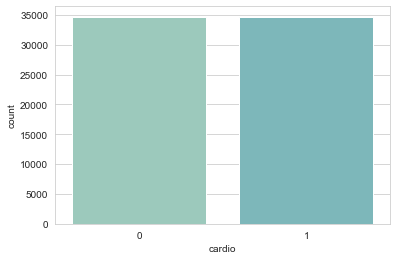

In [899]:
sns.countplot(x='cardio',data=data)

In [900]:
data.gender.value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [901]:
data.gluc.value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

In [902]:
data.cholesterol.value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [903]:
data.smoke.value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

In [904]:
data.alco.value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [905]:
data.active.value_counts()

1    55717
0    13584
Name: active, dtype: int64

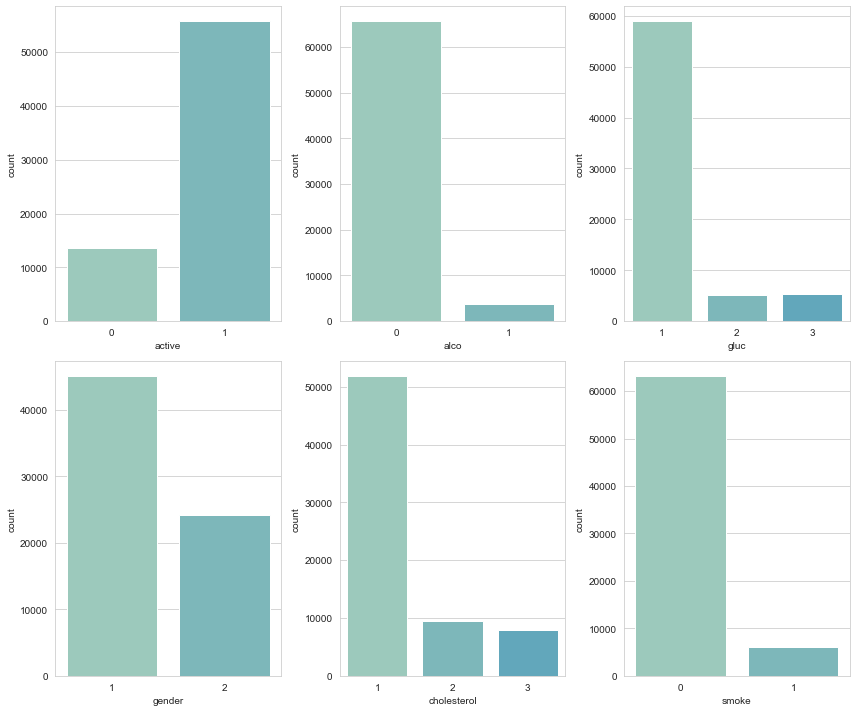

In [906]:
figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.countplot(x='active',data=data)

plt.subplot(2,3,2)
sns.countplot(x='alco',data=data)

plt.subplot(2,3,3)
sns.countplot(x='gluc',data=data)

plt.subplot(2,3,4)
sns.countplot(x='gender',data=data)

plt.subplot(2,3,5)
sns.countplot(x='cholesterol',data=data)

plt.subplot(2,3,6)
sns.countplot(x='smoke',data=data)

plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


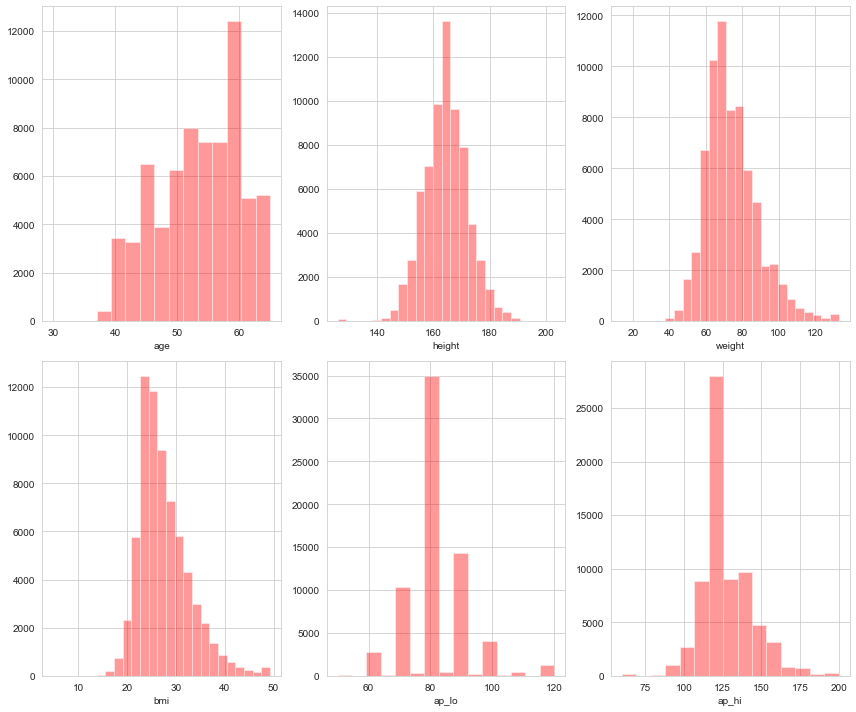

In [907]:
figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.distplot(data['age'], bins=15, kde=False, color="red")

plt.subplot(2,3,2)
sns.distplot(data['height'], bins=25, kde=False, color="red")

plt.subplot(2,3,3)
sns.distplot(data['weight'], bins=25, kde=False, color="red")

plt.subplot(2,3,4)
sns.distplot(data['bmi'], bins=25, kde=False, color="red")


plt.subplot(2,3,5)
sns.distplot(data['ap_lo'], bins=15, kde=False, color="red")

plt.subplot(2,3,6)
sns.distplot(data['ap_hi'], bins=15, kde=False, color="red")

plt.tight_layout()

plt.show()

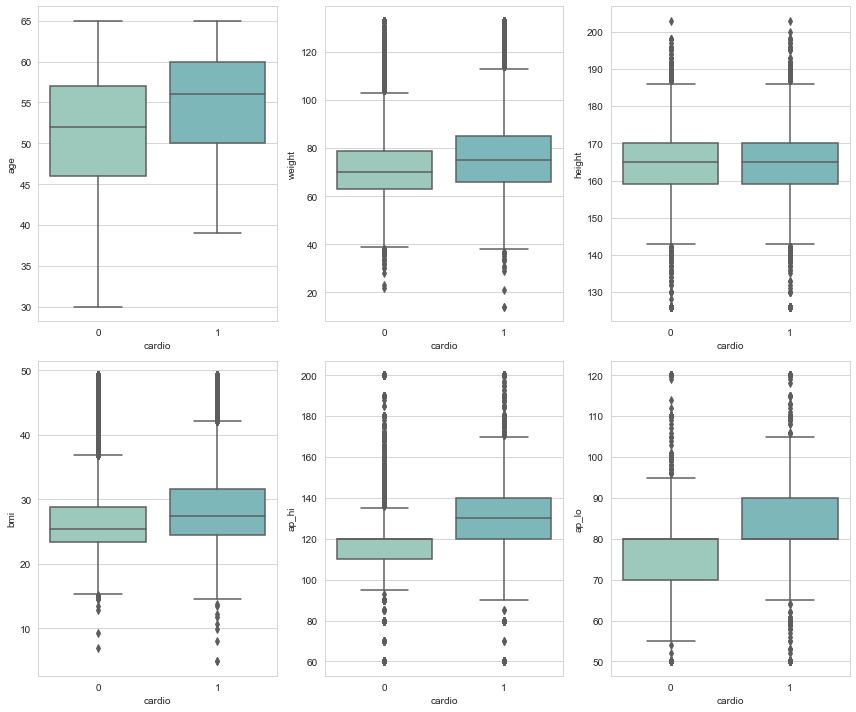

In [908]:
figure3 = plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
sns.boxplot(x='cardio', y='age', data=data)

plt.subplot(2,3,2)
sns.boxplot(x='cardio', y='weight', data=data)

plt.subplot(2,3,3)
sns.boxplot(x='cardio', y='height', data=data)

plt.subplot(2,3,4)
sns.boxplot(x='cardio', y='bmi', data=data)


plt.subplot(2,3,5)
sns.boxplot(x='cardio', y='ap_hi', data=data)

plt.subplot(2,3,6)
sns.boxplot(x='cardio', y='ap_lo', data=data)

plt.tight_layout()

plt.show()

In [909]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

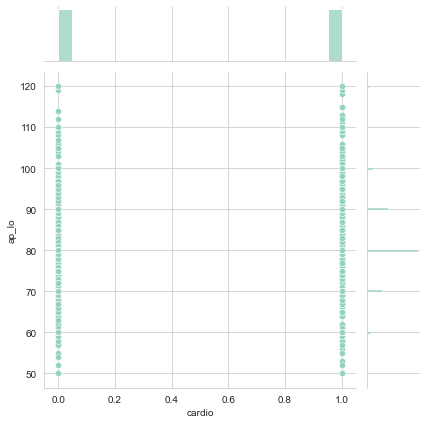

In [910]:
sns.jointplot(x = 'cardio', y = 'ap_lo', data = data)

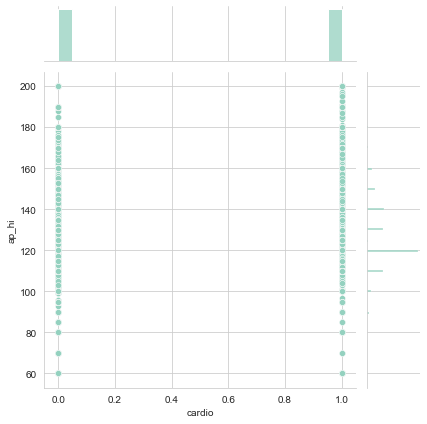

In [911]:
sns.jointplot(x = 'cardio', y = 'ap_hi', data = data)

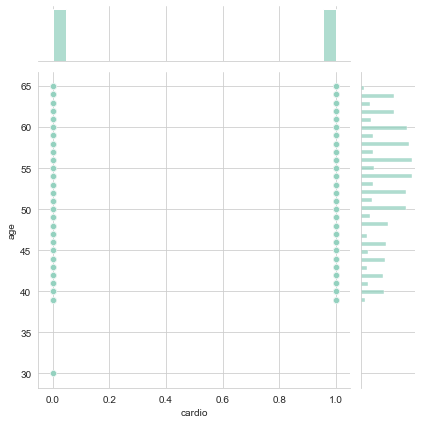

In [912]:
sns.jointplot(x = 'cardio', y = 'age', data = data)

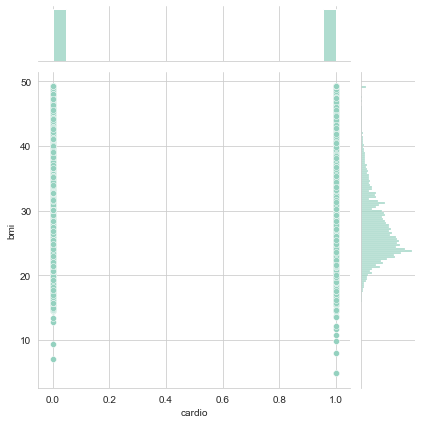

In [913]:
sns.jointplot(x='cardio', y='bmi', data=data)

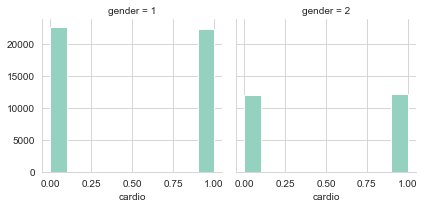

In [914]:
g = sns.FacetGrid(data=data,col='gender')
g.map(plt.hist,'cardio')

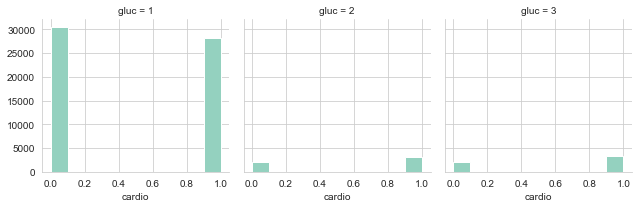

In [915]:
g = sns.FacetGrid(data=data,col='gluc')
g.map(plt.hist,'cardio')

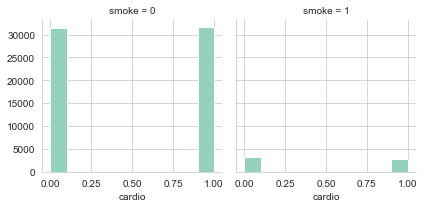

In [916]:
g = sns.FacetGrid(data=data,col='smoke')
g.map(plt.hist,'cardio')

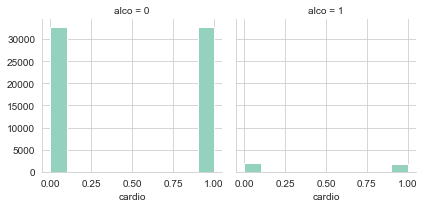

In [917]:
g = sns.FacetGrid(data=data,col='alco')
g.map(plt.hist,'cardio')

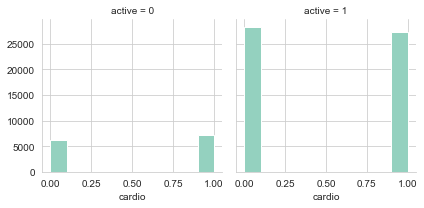

In [918]:
g = sns.FacetGrid(data=data,col='active')
g.map(plt.hist,'cardio')

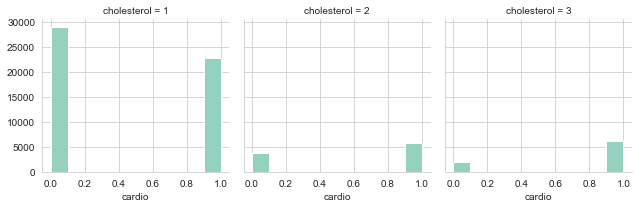

In [919]:
g = sns.FacetGrid(data=data,col='cholesterol')
g.map(plt.hist,'cardio')

In [920]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.023360,-0.084454,0.055819,0.201653,0.147323,0.154297,0.098985,-0.047936,-0.029660,-0.009801,0.237709,0.102015
gender,-0.023360,1.000000,0.513610,0.157233,0.060152,0.067062,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592,-0.110599
height,-0.084454,0.513610,1.000000,0.304102,0.015151,0.032035,-0.053322,-0.020335,0.193188,0.096598,-0.007075,-0.011855,-0.216733
weight,0.055819,0.157233,0.304102,1.000000,0.267074,0.249704,0.143243,0.107990,0.068868,0.067568,-0.017181,0.183429,0.857488
ap_hi,0.201653,0.060152,0.015151,0.267074,1.000000,0.684838,0.191334,0.090982,0.028066,0.032384,0.003036,0.418812,0.262995
ap_lo,0.147323,0.067062,0.032035,0.249704,0.684838,1.000000,0.155771,0.073118,0.026881,0.040399,0.003027,0.337503,0.236934
cholesterol,0.154297,-0.036335,-0.053322,0.143243,0.191334,0.155771,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752,0.172291
gluc,0.098985,-0.021154,-0.020335,0.107990,0.090982,0.073118,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062,0.119492
smoke,-0.047936,0.337608,0.193188,0.068868,0.028066,0.026881,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225,-0.032139
alco,-0.029660,0.171015,0.096598,0.067568,0.032384,0.040399,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217,0.017431


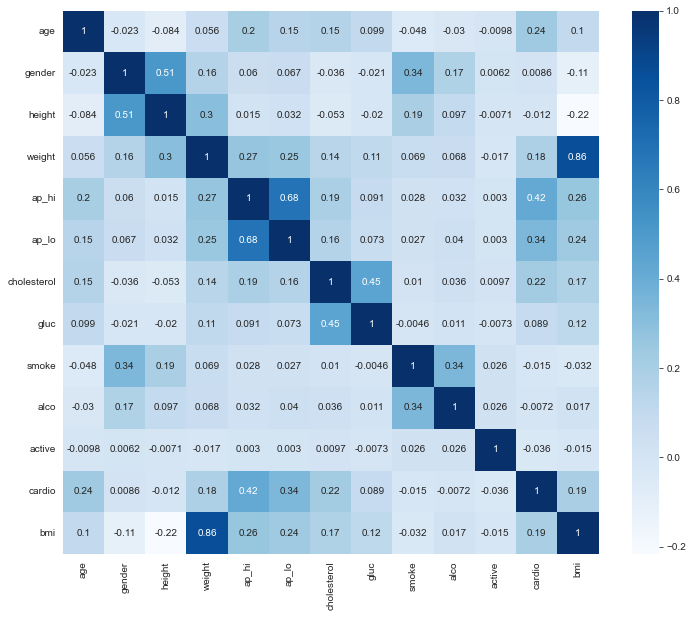

In [921]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")
fig = plt.gcf()
fig.set_size_inches(12,10)

In [922]:
from sklearn.model_selection import train_test_split
x=data.drop('cardio',axis=1)
y=data.cardio
x_test, x_train, y_test, y_train= train_test_split(x,y,test_size = .33,random_state=42)

In [923]:
model = LogisticRegression()

In [924]:
model.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [925]:
model.score(x_train,y_train)

0.725360734586795

In [995]:
age=60
gender=0
height=160
weight=90
ap_hi=120
ap_lo=90
chol=3
gluc=3
smoke=1
alco=1
active=1
bmi=round(weight/ (height/100)**2, 2)
features =np.array([[age,gender,height,weight,ap_hi,ap_lo,chol,gluc,smoke,alco,active,bmi]])
y_pred = model.predict(features)
print(y_pred)

[1]


In [984]:
y_pred = model.predict(x_test)

In [985]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,18109,5192
1,7470,15660


In [754]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model=MultinomialNB()
from sklearn.preprocessing import MinMaxScaler #fixed import
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [755]:
model.fit(x_train,y_train)

MultinomialNB()

In [756]:
model.score(x_train,y_train)

0.5926541320507215